In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from math import * 

os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
if path_parent.endswith("Abaqus-Macromechanics-Project"):
    os.chdir(path_parent) 
    print("Moving up to the parent directory")
    print(os.getcwd())

from modules.helper import *

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [2]:
# Add column force,N to the target curve
# Create new dataframe

targetPathCurve1 = "MOO_targets/DP1000_400C_SwiftVoce_curve1/NDBR50/FD_Curve.csv"
targetPathCurve2 = "MOO_targets/DP1000_400C_SwiftVoce_curve1/NDBR6/FD_Curve.csv"
targetPathCurve3 = "MOO_targets/DP1000_400C_SwiftVoce_curve1/CHD6/FD_Curve.csv"

# df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
# targetCurve = pd.read_csv(f"{targetPathCurve1}")
# df['displacement/mm'] = targetCurve['displacement/mm']
# df['force/kN'] = targetCurve['force/kN']
# df['force/N'] = targetCurve['force/kN'] * 1e3
# df.to_csv(f"{targetPathCurve1}",index=False)

# df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
# targetCurve = pd.read_csv(f"{targetPathCurve2}")
# df['displacement/mm'] = targetCurve['displacement/mm']
# df['force/kN'] = targetCurve['force/kN'] 
# df['force/N'] = targetCurve['force/kN'] * 1e3
# df.to_csv(f"{targetPathCurve2}",index=False)

# df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
# targetCurve = pd.read_csv(f"{targetPathCurve3}")
# df['displacement/mm'] = targetCurve['displacement/mm']
# df['force/kN'] = targetCurve['force/kN'] 
# df['force/N'] = targetCurve['force/kN'] * 1e3
# df.to_csv(f"{targetPathCurve3}",index=False)

Yielding point 1: 2
Yielding point 2: 303
Yielding point 3: 2


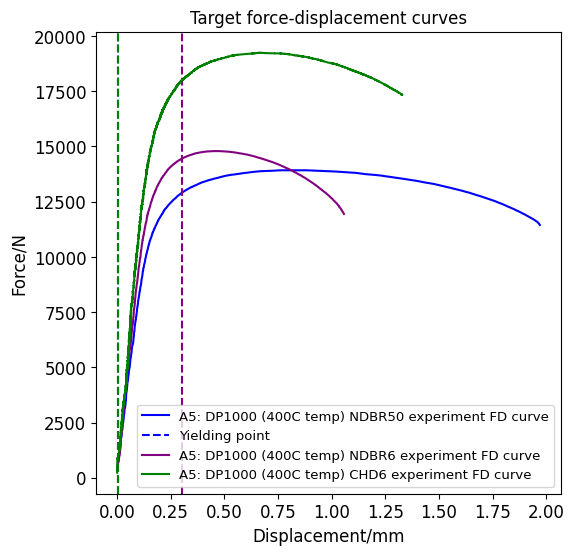

In [23]:
# Plot all target curves
colors = ["blue", "purple", "green"]
startingIndex = 20
r2_threshold = 0.835
targetCurve1 = pd.read_csv(targetPathCurve1)
yieldPoint1 = calculate_yielding_index(targetCurve1['displacement/mm'], targetCurve1['force/N'], r2_threshold=r2_threshold)
targetCurve2 = pd.read_csv(targetPathCurve2)
yieldPoint2 = calculate_yielding_index(targetCurve2['displacement/mm'], targetCurve2['force/N'], r2_threshold=r2_threshold)
targetCurve3 = pd.read_csv(targetPathCurve3)
yieldPoint3 = calculate_yielding_index(targetCurve3['displacement/mm'], targetCurve3['force/N'], r2_threshold=r2_threshold)

fontsize=12
# Plot all target curves
plt.figure(figsize=(6,6))
# line type is -- 
plt.plot(targetCurve1['displacement/mm'], targetCurve1['force/N'], color="blue",label='A5: DP1000 (400C temp) NDBR50 experiment FD curve')
# vertical red line
plt.axvline(x=targetCurve1['displacement/mm'][yieldPoint1], color='blue', linestyle='--', label='Yielding point')
plt.plot(targetCurve2['displacement/mm'], targetCurve2['force/N'], color="purple", label='A5: DP1000 (400C temp) NDBR6 experiment FD curve')
plt.axvline(x=targetCurve2['displacement/mm'][yieldPoint2], color="purple", linestyle='--')
plt.plot(targetCurve3['displacement/mm'], targetCurve3['force/N'], color="green", label='A5: DP1000 (400C temp) CHD6 experiment FD curve')
plt.axvline(x=targetCurve3['displacement/mm'][yieldPoint3], color='green', linestyle='--')
plt.title('Target force-displacement curves', fontsize=fontsize)
plt.xlabel('Displacement/mm',fontsize=fontsize)
plt.ylabel('Force/N', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize-2.5)